# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**


--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

### **Please read the instructions carefully before starting the project.**

This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.

* Blanks '_______' are provided in the notebook that needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# Fill in the blank" or "# Complete the code". Running incomplete code may throw an error.
* Remove the blank and state your observations in detail wherever the mark down says 'Write your observations here:_________'
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final report.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [13]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [14]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

**Let us check the version of tensorflow.**

In [15]:
print(tf.__version__)

2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [16]:
import h5py

# Open the file as read only
# User can make changes in the path as required

h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Let's check the number of images in the training and the testing dataset.

In [17]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

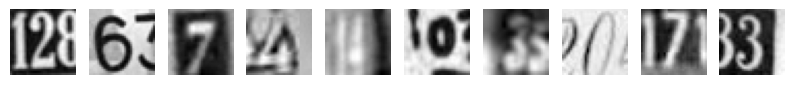

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [18]:
# Visualizing the first 10 images in the dataset and printing their labels

plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)

    plt.imshow(X_train[i], cmap = "gray")

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [19]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [20]:
# Reshaping the dataset to flatten them. We are reshaping the 2D image into 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

### **Normalize the train and the test data.**

In [21]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train.astype('float32') / 255

X_test = X_test.astype('float32') / 255

In [22]:
# New shape

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [23]:
# One-hot encode output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# Test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
- Notice that each entry of the target variable is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

In [24]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [25]:
# Define the model

def nn_model_1():

    model_1 = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

    model_1.add(Dense(64,activation='relu',input_shape = (1024,)))

    model_1.add(Dense(32,activation='relu'))

    model_1.add(Dense(10, activation = 'softmax'))

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(0.001)
    model_1.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

    return model_1

In [26]:
# Build the model

model_1 = nn_model_1()

In [27]:
# Print the summary

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                65600     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Fit the model

history_model_1=model_1.fit(X_train, y_train,
          validation_split=0.2,
          epochs=20,
          batch_size=128,verbose=1)

Epoch 1/20
263/263 [==============================] - 3s 7ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 1s 5ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [==============================] - 2s 9ms/step - loss: 1.8679 - accuracy: 0.3405 - val_loss: 1.7779 - val_accuracy: 0.3869
Epoch 4/20
263/263 [==============================] - 2s 7ms/step - loss: 1.6573 - accuracy: 0.4391 - val_loss: 1.5288 - val_accuracy: 0.4907
Epoch 5/20
263/263 [==============================] - 2s 8ms/step - loss: 1.4635 - accuracy: 0.5180 - val_loss: 1.4202 - val_accuracy: 0.5255
Epoch 6/20
263/263 [==============================] - 2s 9ms/step - loss: 1.3588 - accuracy: 0.5568 - val_loss: 1.3240 - val_accuracy: 0.5768
Epoch 7/20
263/263 [==============================] - 3s 11ms/step - loss: 1.2895 - accuracy: 0.5839 - val_loss: 1.2558 - val_accuracy: 0.6013
Epoch

### **Plotting the validation and training accuracies**

### **Write your observations on the below plot.**

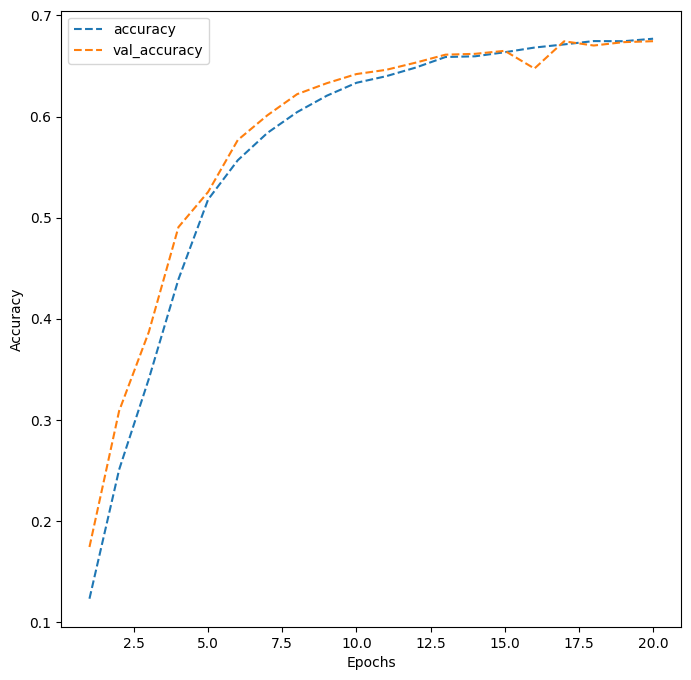

In [29]:
# Plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**

- No noise observed in actual data vs test data

- Accuracy of the model is be low 70%. This can be improved


Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [30]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [31]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture.**

In [32]:
# Define the model



def nn_model_2():

    model_2 = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

    model_2.add(Dense(256,activation='relu',input_shape = (1024,)))

    model_2.add(Dense(128,activation='relu'))

    model_2.add(Dropout(0.2))

    model_2.add(Dense(64, activation='relu'))

    model_2.add(Dense(64, activation='relu'))

    model_2.add(Dense(32, activation='relu'))

    model_2.add(BatchNormalization(synchronized=True))

    model_2.add(Dense(10, activation = 'softmax'))

    # Compile the model
    opt = tf.keras.optimizers.Adam(learning_rate = 0.0005)
    model_2.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model_2



In [33]:
model_2 = nn_model_2()

In [34]:
# Build the model

model_2 = nn_model_2()

In [35]:
# Print the model summary
model_2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               262400    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)              

In [36]:
# Fit the model
history_model_2 = model_2.fit(X_train,y_train,batch_size=128,epochs=30,verbose=1,validation_split = 0.2)

Epoch 1/30
263/263 [==============================] - 7s 18ms/step - loss: 2.3375 - accuracy: 0.1035 - val_loss: 2.3096 - val_accuracy: 0.0995
Epoch 2/30
263/263 [==============================] - 3s 12ms/step - loss: 2.1841 - accuracy: 0.1763 - val_loss: 2.0983 - val_accuracy: 0.2996
Epoch 3/30
263/263 [==============================] - 3s 12ms/step - loss: 1.6900 - accuracy: 0.4085 - val_loss: 1.5781 - val_accuracy: 0.4838
Epoch 4/30
263/263 [==============================] - 3s 13ms/step - loss: 1.4113 - accuracy: 0.5310 - val_loss: 1.2484 - val_accuracy: 0.5974
Epoch 5/30
263/263 [==============================] - 5s 17ms/step - loss: 1.2407 - accuracy: 0.5978 - val_loss: 1.1742 - val_accuracy: 0.6199
Epoch 6/30
263/263 [==============================] - 3s 12ms/step - loss: 1.1574 - accuracy: 0.6293 - val_loss: 1.0558 - val_accuracy: 0.6696
Epoch 7/30
263/263 [==============================] - 3s 12ms/step - loss: 1.0888 - accuracy: 0.6526 - val_loss: 1.0455 - val_accuracy: 0.6675

### **Plotting the validation and training accuracies**

### **Write your observations on the below plot.**

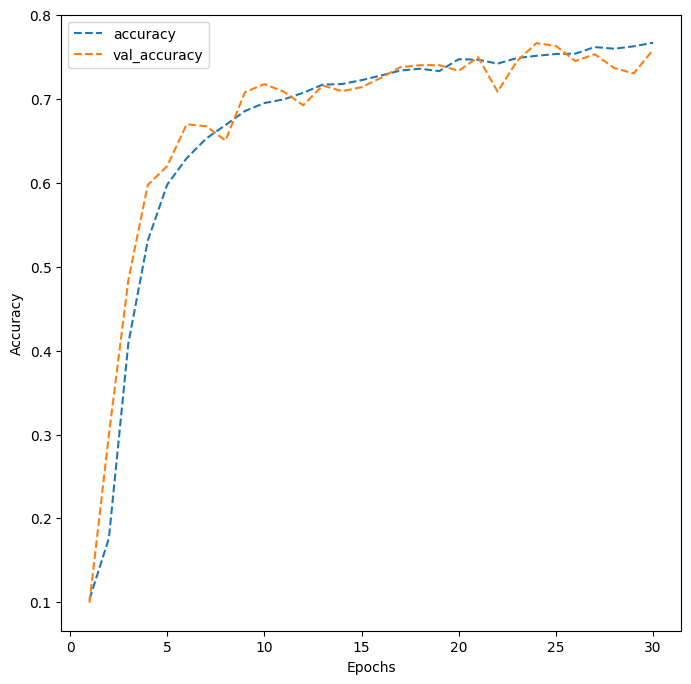

In [37]:
# Plotting the accuracies

dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()



```
# This is formatted as code
```

**Observations:**

- Some noise observed in the test model, however, it appears to match the training model

- Validation accuracy is close to tranining accuracy this shows model accuracy

- Unfortunately, the accuracy of the model is still below 80%


## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [38]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 2s 4ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [39]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)


In [40]:
import warnings
warnings.filterwarnings("ignore")

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

In [41]:
# Importing required functions

# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print =(classification_report(y_test, test_pred))




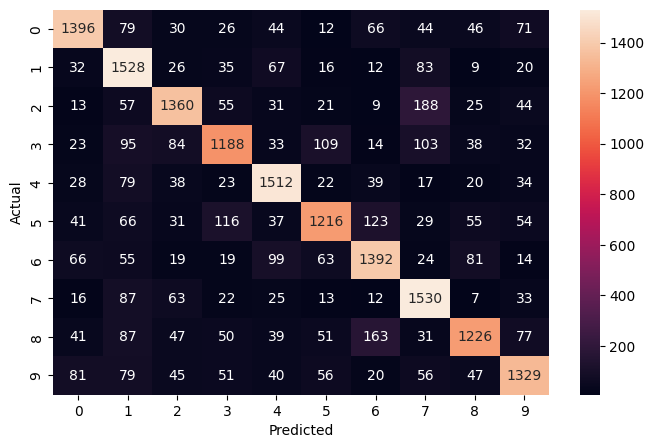

In [42]:
# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)     #Write the code for creating confusion matrix using actual labels (y_test) and predicted labels (test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:**

- We observe that most of the classes are predicted correctly
- However we do observe misclassification occurs with digits 2, 3, 5 and 8
- Digits 1, 2 and 3 seem to be misclassified with digit 7
- Digit 5 is sometimes misclassified with digit 3
- Digit 5 seems to be misclassified with digits 3 and 6
- Digit 8 seems to be misclassified with digit 6

## **Using Convolutional Neural Networks**

In [43]:
h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Let's check the number of images in the training and the testing dataset.

In [44]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data.

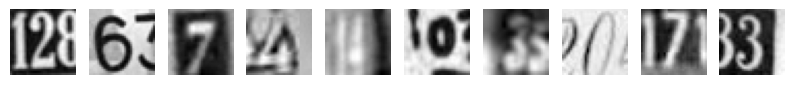

array([2, 6, 7, 4, 4, 0, 3, 0, 7, 3], dtype=uint8)

In [45]:
# Visualizing the first 10 images in the dataset and printing their labels

plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)

    plt.imshow(X_train[i], cmap = "gray")

    plt.axis('off')

plt.show()

image_labels = (y_train[0:10])

image_labels


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [46]:
# Shape of the first image
Shape = X_train[0].shape
Shape

(32, 32)

In [47]:
# the array of pixels for the first image
First_image = X_train[0]
First_image

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [48]:
# Reshaping the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [49]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0

X_test = X_test / 255.0

In [50]:
# New shape - Training set
Training_set = X_train.shape, y_train.shape

Training_set

((42000, 32, 32, 1), (42000,))

In [51]:
# New shape - Testing set
Test_set = X_test.shape, y_test.shape

Test_set

((18000, 32, 32, 1), (18000,))

### **One-hot encode the labels in the target variable y_train and y_test.**

In [52]:
# Write the function and appropriate variable name to one-hot encode the output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
- Notice that each entry of the target variable is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.

In [53]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [54]:
# Define the model

def cnn_model_1():

    model = Sequential()

    from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

    from tensorflow.keras.optimizers import Adam

    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Conv2D(16, (3,3), padding="same", input_shape=(32,32,1)))

    model.add(layer = tf.keras.layers.LeakyReLU(alpha=0.1))

    model.add(Conv2D(32, (3,3), padding = "same"))

    model.add(layer = tf.keras.layers.LeakyReLU(alpha=0.1))

    model.add(MaxPooling2D(2,2))

    model.add(Flatten())

    model.add(Dense(32))

    model.add(layer = tf.keras.layers.LeakyReLU(alpha=0.1))

    model.add(Dense(10, activation = 'softmax'))

    # Compile the model

    opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model

In [55]:
# Build the model

model=cnn_model_1()

In [56]:
# Print the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                      

In [57]:
# Fit the model

history_model = model.fit(X_train,y_train,batch_size=32,epochs=20,verbose=1,validation_split = 0.2)

Epoch 1/20
1050/1050 [==============================] - 90s 84ms/step - loss: 1.1274 - accuracy: 0.6303 - val_loss: 0.6497 - val_accuracy: 0.8087
Epoch 2/20
1050/1050 [==============================] - 90s 85ms/step - loss: 0.5352 - accuracy: 0.8475 - val_loss: 0.5254 - val_accuracy: 0.8448
Epoch 3/20
1050/1050 [==============================] - 88s 84ms/step - loss: 0.4416 - accuracy: 0.8700 - val_loss: 0.5049 - val_accuracy: 0.8532
Epoch 4/20
1050/1050 [==============================] - 86s 82ms/step - loss: 0.3781 - accuracy: 0.8888 - val_loss: 0.4486 - val_accuracy: 0.8739
Epoch 5/20
1050/1050 [==============================] - 88s 84ms/step - loss: 0.3330 - accuracy: 0.9004 - val_loss: 0.4592 - val_accuracy: 0.8717
Epoch 6/20
1050/1050 [==============================] - 88s 84ms/step - loss: 0.2944 - accuracy: 0.9115 - val_loss: 0.4640 - val_accuracy: 0.8735
Epoch 7/20
1050/1050 [==============================] - 88s 84ms/step - loss: 0.2622 - accuracy: 0.9216 - val_loss: 0.4506 -

### **Plotting the validation and training accuracies**

### **Write your observations on the below plot.**

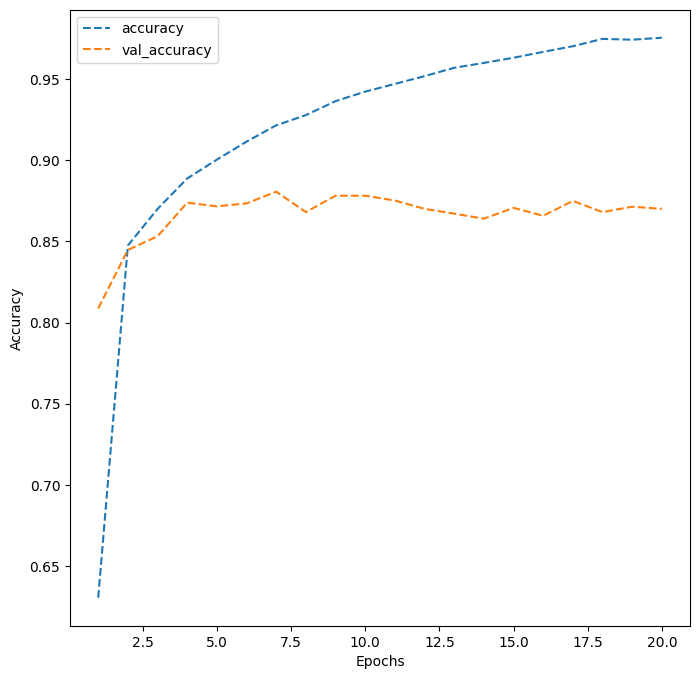

In [58]:
# Plotting the accuracies

dict_hist = history_model.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**

- Much improved accuracy and validation accuracy compared to the ANN. However, the training and test group do not match in their accuracy





Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [59]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [60]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

In [61]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [62]:
# Define the model

def cnn_model_2():

    from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

    from tensorflow.keras.optimizers import Adam

    cnn_model_2 = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

    cnn_model_2.add(Conv2D(16, (3,3), padding="same", input_shape=(32,32,1)))

    cnn_model_2.add(layer = tf.keras.layers.LeakyReLU(alpha=0.1))

    cnn_model_2.add(Conv2D(32, (3,3), padding = "same"))

    cnn_model_2.add(layer = tf.keras.layers.LeakyReLU(alpha=0.1))

    cnn_model_2.add(MaxPooling2D(2,2))

    cnn_model_2.add(BatchNormalization(synchronized=True))

    cnn_model_2.add(Conv2D(32, (3,3), padding = "same"))

    cnn_model_2.add(layer = tf.keras.layers.LeakyReLU(alpha=0.1))

    cnn_model_2.add(Conv2D(64, (3,3), padding = "same"))

    cnn_model_2.add(layer = tf.keras.layers.LeakyReLU(alpha=0.1))

    cnn_model_2.add(MaxPooling2D(2,2))

    cnn_model_2.add(BatchNormalization(synchronized=True))

    cnn_model_2.add(Flatten())

    cnn_model_2.add(Dense(32))

    cnn_model_2.add(layer = tf.keras.layers.LeakyReLU(alpha=0.1))

    cnn_model_2.add(Dropout(0.5))

    cnn_model_2.add(Dense(10, activation = 'softmax'))

    # Compile the model

    opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
    cnn_model_2.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    return cnn_model_2

In [63]:
# Build the model

cnn_model_2 = cnn_model_2()

In [64]:
# Print the summary

cnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [65]:
# Fit the model

history_cnn_model_2 = cnn_model_2.fit(X_train,y_train,batch_size=128,epochs=30,verbose=1,validation_split = 0.2)

Epoch 1/30
263/263 [==============================] - 154s 571ms/step - loss: 1.3273 - accuracy: 0.5482 - val_loss: 1.6967 - val_accuracy: 0.4724
Epoch 2/30
263/263 [==============================] - 154s 585ms/step - loss: 0.6648 - accuracy: 0.7963 - val_loss: 0.5475 - val_accuracy: 0.8496
Epoch 3/30
263/263 [==============================] - 150s 571ms/step - loss: 0.5513 - accuracy: 0.8302 - val_loss: 0.6244 - val_accuracy: 0.8130
Epoch 4/30
263/263 [==============================] - 148s 562ms/step - loss: 0.4904 - accuracy: 0.8509 - val_loss: 0.4004 - val_accuracy: 0.8867
Epoch 5/30
263/263 [==============================] - 146s 557ms/step - loss: 0.4402 - accuracy: 0.8643 - val_loss: 0.4226 - val_accuracy: 0.8800
Epoch 6/30
263/263 [==============================] - 147s 559ms/step - loss: 0.4043 - accuracy: 0.8745 - val_loss: 0.3893 - val_accuracy: 0.8970
Epoch 7/30
263/263 [==============================] - 146s 555ms/step - loss: 0.3858 - accuracy: 0.8804 - val_loss: 0.4355 -

### **Plotting the validation and training accuracies**

### **Write your observations on the below plot**

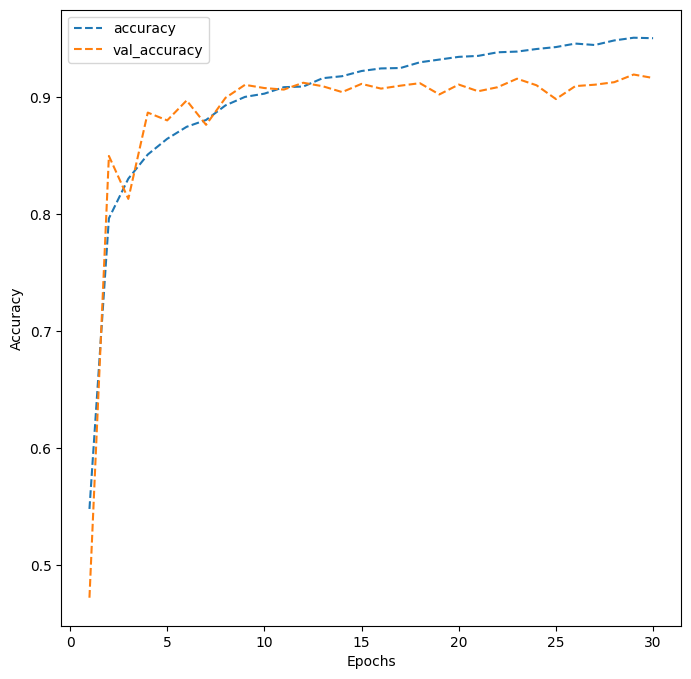

In [66]:
# Plotting the accuracies

dict_hist = history_cnn_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**

- Increased accuracy in bothe the training and testing sets
- Accuracy in both sets match
- Improved performance in this model


## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [67]:
# Make prediction on the test data using model_2

test_pred = cnn_model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 23s 40ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [68]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

### **Write your final observations on the performance of the model on the test data.**

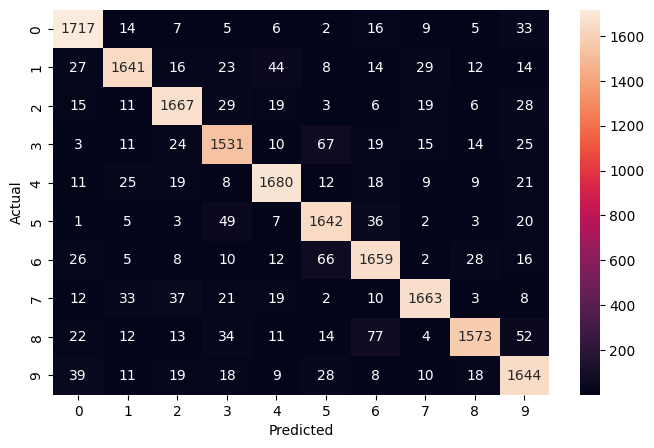

In [70]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

classification_report = y_test, test_pred

classification_report

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:**

- CNN took a longer time to compute than ANN, however the results were much better especially in the our second CNN model

- Why can we say the results are much better in the second CNN model? Because there is more accuracy as mobd=served in our model and validation plots, less misclassification as observed in the confusion matrix.
- Misclassification in the cnn_model_2 occcurs with 8 misclassified as 6, 3 misclassodes as 5, 5 misclassified sometimes as 3
- None of these misclassification occur in the hundreds unlike the ANN models

- The second CNN model (cnn_model_2) provides the best performance with an accuracy of ~95% and validation accuracy of ~91% , thus, it should be selected for this SVHN dataset